COME FARE UNA ANALISI E UNA CLUSTERIZZAZIONE CON K-MEANS:
la clusterizzazione divide il dataset in gruppi che hanno la stessa distanza da un punto mediano mediante un loop che posiziona i punti ne vari cluster partendo da una divisione random.

STEP 1: Importare il database

In [1]:
import pandas as pd

In [2]:
# importiamo il dataset e selezioniamo le colonne che ci interessano
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


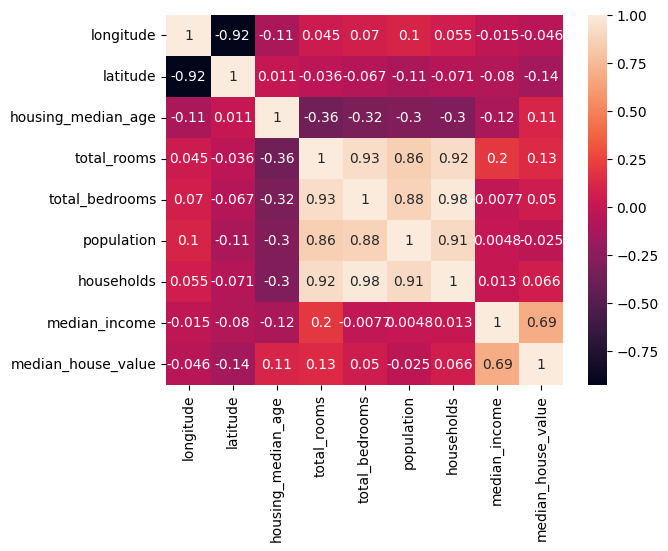

In [3]:
# https://stackoverflow.com/questions/39409866/correlation-heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.corr()
sns.heatmap(correlations, annot=True)
plt.show()


In [ ]:
#sns.pairplot(data = df, hue = "median_house_value", palette = "Accent")
#plt.show()

In [4]:
# importiamo il dataset e selezioniamo le colonne che ci interessano
col1 = 'households'
col2 = 'median_income'
col3 = 'median_house_value'
housing = pd.read_csv('housing.csv', usecols=[col1, col2, col3])

In [5]:
housing.head()

,households,median_income,median_house_value
0,126.0,8.3252,452600.0
1,1138.0,8.3014,358500.0
2,177.0,7.2574,352100.0
3,219.0,5.6431,341300.0
4,259.0,3.8462,342200.0


STEP 2: visualizzazione e analisi del database

<AxesSubplot:xlabel='households', ylabel='median_income'>

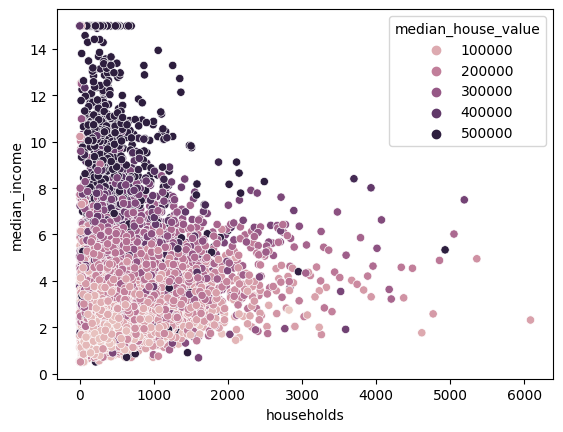

In [6]:
sns.scatterplot(x=col1, y=col2, data=housing, hue=col3)

In [7]:
# analisi ETL
print('\nhousing.info()')
print(housing.info())

# analisi statistica
print('\nhousing.describe()')
print(housing.describe())

# analisi valori nulli
print('\nhousing.isnull().sum()')
print(housing.isnull().sum())

# analisi valori duplicati
print('\nhousing.duplicated().sum()')
print(housing.duplicated().sum())

# analisi valori unici
print('\nhousing.nunique()')
print(housing.nunique())

# analisi delle correlazioni
print('\nhousing.corr()')
print(housing.corr())



housing.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   households          20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None

housing.describe()
         households  median_income  median_house_value
count  20640.000000   20640.000000        20640.000000
mean     499.539680       3.870671       206855.816909
std      382.329753       1.899822       115395.615874
min        1.000000       0.499900        14999.000000
25%      280.000000       2.563400       119600.000000
50%      409.000000       3.534800       179700.000000
75%      605.000000       4.743250       264725.000000
max     6082.000000      15.000100       500001.000000

housing.isnull().sum()
households            0
median_income        

STEP 3: Normalizzare i dati altrimenti i pesi verranno letti diversamente dall'algoritmo che calcola la distanza euclidea tra i punti

In [8]:
# usiamo sklearn per fare la normalizzazione
# per prima cosa occorre dividere il dataset in train e test
from sklearn.model_selection import train_test_split

X = housing[[col1, col2]]
y = housing[col3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# normalizziamo i dati
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

K-MEANS

STEP 4: Creiamo i cluster di partenza e poi valuteremo quanti cluster sono ottimali per suddividere il dataset

In [18]:
# importiamo le librerie per fare il clustering dividendolo ad esempio in 3 cluster
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3, random_state=0)
Kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='households', ylabel='median_income'>

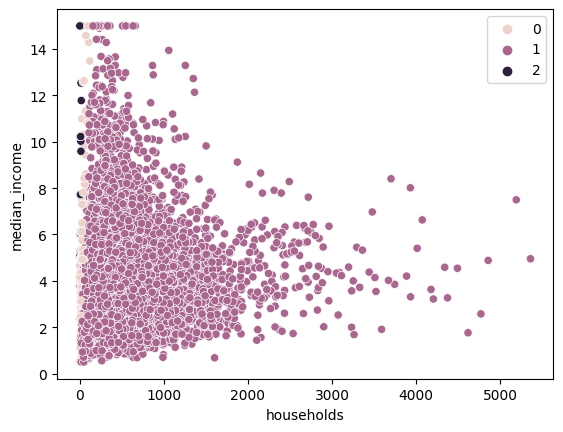

In [19]:
# ora mettiamo a video il risultato della suddivisione usanto il database originale assegnando la label del cluster
# a ciascun punto

sns.scatterplot(data = X_train, x = col1, y = col2, hue = Kmeans.labels_)

<AxesSubplot:ylabel='median_house_value'>

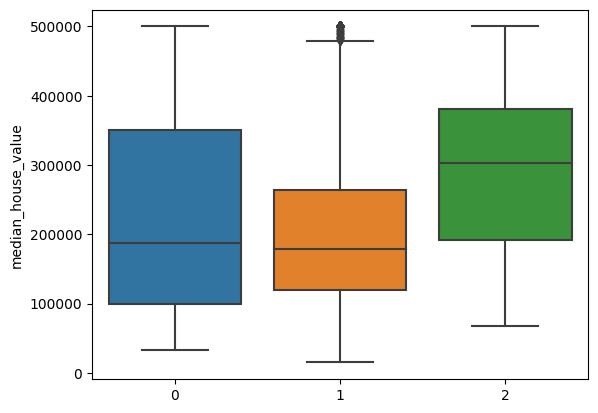

In [20]:
# ora vediamo come si distribuiscono i valori della variabile target nei cluster
sns.boxplot(x = Kmeans.labels_, y = y_train)

In [21]:
# misuriamo quanto sia attendibile il clustering con il metodo silhouette
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, Kmeans.labels_, metric='euclidean')

0.9394941349997589

STEP 5: Scegliere quale sia il miglior clustering per suddividere il dataset

[0.9731609602390385, 0.9394941349997589, 0.8866207461262215, 0.7778923790106164, 0.7099231212328732, 0.6512354781385177, 0.6422383700758042, 0.6112900363759493, 0.6102397893839684, 0.5919163616513551]
il migliore è: 11


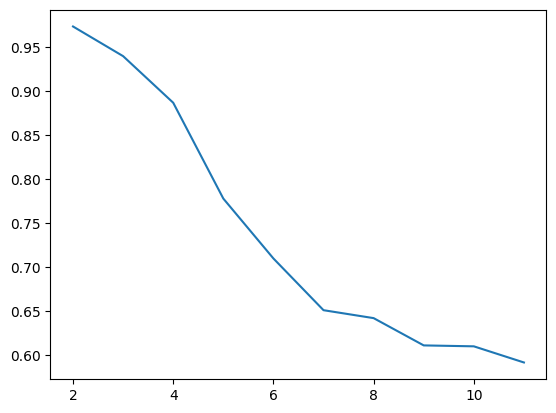

In [22]:
# proviamo a fare il clustering con un numero di cluster diverso e vediamo come cambia il valore della silhouette
K = range(2, 12)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

# mettiamo a video il risultato e vediamo che il valore migliore è con 5 cluster
sns.lineplot(x=K, y=score)

print(score)
print(f'il migliore è: {K[score.index(min(score))]}')

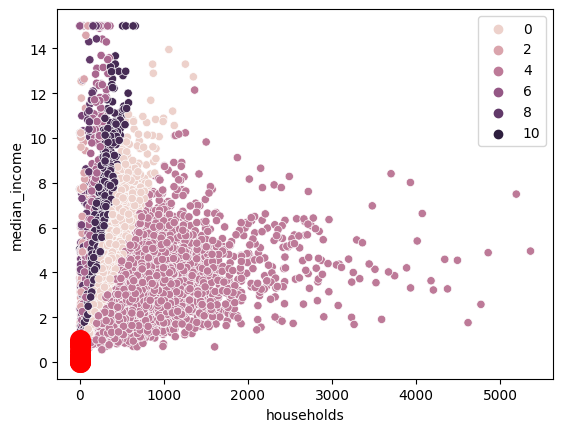

In [23]:
# visualizziamo il risultato del clustering con 9 cluster
sns.scatterplot(data = X_train, x = col1, y = col2, hue = fits[score.index(min(score))].labels_)
plt.scatter(fits[score.index(min(score))].cluster_centers_[:,0],fits[score.index(min(score))].cluster_centers_[:,1], s=200, marker='o', c="red", label = "Centroid")


<AxesSubplot:ylabel='median_house_value'>

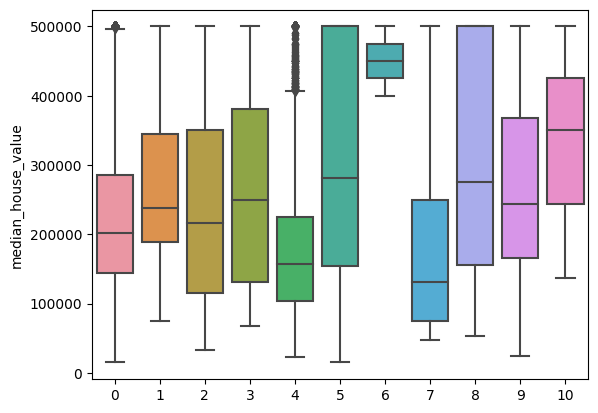

In [24]:
sns.boxplot(x = fits[score.index(min(score))].labels_, y = y_train)

DBSCAN

STEP 4: Creiamo i cluster di partenza e poi valuteremo quanti cluster sono ottimali per suddividere il dataset

In [25]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.1, min_samples=1)
dbscan.fit(X_train_norm)
print(dbscan.labels_)
number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
print(number_of_clusters)

[0 0 0 ... 0 0 0]
4


<AxesSubplot:xlabel='households', ylabel='median_income'>

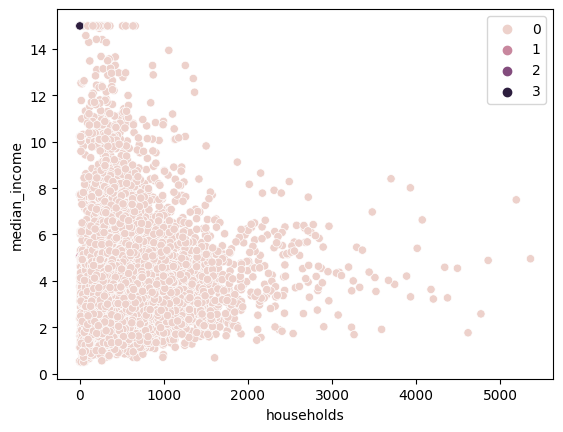

In [16]:
# ora mettiamo a video il risultato della suddivisione usanto il database originale assegnando la label del cluster
# a ciascun punto

sns.scatterplot(data = X_train, x = col1, y = col2, hue = dbscan.labels_)

<AxesSubplot:ylabel='median_house_value'>

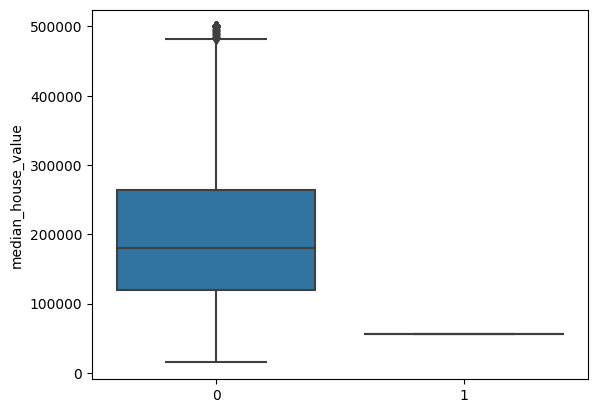

In [ ]:
# ora vediamo come si distribuiscono i valori della variabile target nei cluster
sns.boxplot(x = dbscan.labels_, y = y_train)

In [ ]:
# misuriamo quanto sia attendibile il clustering con il metodo silhouette
from sklearn.metrics import silhouette_score

try:
    print(silhouette_score(X_train_norm, dbscan.labels_))

except ValueError:
    print(f'silhouette non funziona con DBSCAN con {number_of_clusters} cluster')

STEP 5: Scegliere quale sia il miglior clustering per suddividere il dataset

In [10]:
# il miglior modo per valutare le performance di un modello è osservare come cambiano le metriche 
#al variare dei suoi iperparametri. Definiamo il set di iperparametri da provare

import numpy as np

eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(1, 10, 1)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
# scriviamo una funzione che ci permetta di testare i vari iperparametri e di visualizzare i risultati
# https://www.alessiovaccaro.com/resources/dbscan-grid-search.php 

from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)


In [13]:
# Istanziamo i due dataframe che conterranno i risultati del grid search:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [14]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, X_train_norm, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric


ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   1 |  None    4
  2 | Tested with eps = 0.1 and min_samples =   2 | 0.354    2
  3 | Tested with eps = 0.1 and min_samples =   3 | 0.354    2
  4 | Tested with eps = 0.1 and min_samples =   4 | 0.225    1
  5 | Tested with eps = 0.1 and min_samples =   5 | 0.225    1
  6 | Tested with eps = 0.1 and min_samples =   6 | 0.225    1
  7 | Tested with eps = 0.1 and min_samples =   7 | 0.225    1
  8 | Tested with eps = 0.1 and min_samples =   8 |  0.12    1
  9 | Tested with eps = 0.1 and min_samples =   9 |  0.12    1
 10 | Tested with eps = 0.2 and min_samples =   1 |  None    2
 11 | Tested with eps = 0.2 and min_samples =   2 |  None    2
 12 | Tested with eps = 0.2 and min_samples =   3 | 0.354    1
 13 | Tested with eps = 0.2 and min_samples =   4 | 0.354    1
 14 | Tested with eps = 0.2 and min_samples =   5